# CSV, JSON 파일 구조 이해

## CSV 파일

- 스프레드시트와 데이터베이스에 대한 가장 일반적인 가져오기 및 내보내기 형식

- [RFC4180](https://datatracker.ietf.org/doc/html/rfc4180.html) 표준 정의

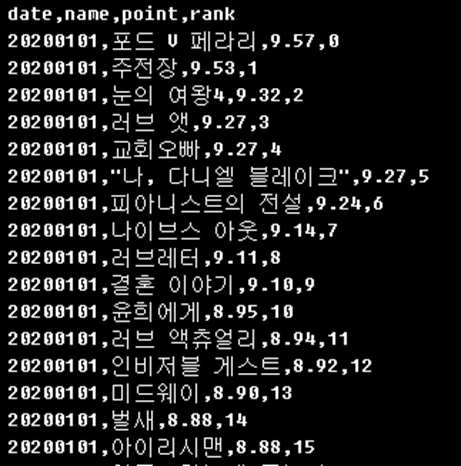

## JSON 파일

- JavaScript Object Notation
- 속성-값 쌍(attribute–value pairs)
- 배열 자료형(array data types)
- 기타 모든 시리얼화 가능한 값(serializable value)
- "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 텍스트를 사용하는 개방형 표준 포맷
- JSON 자료형 : 숫자, 문자, 배열, 객체

- [JSON 위키](https://ko.wikipedia.org/wiki/JSON)

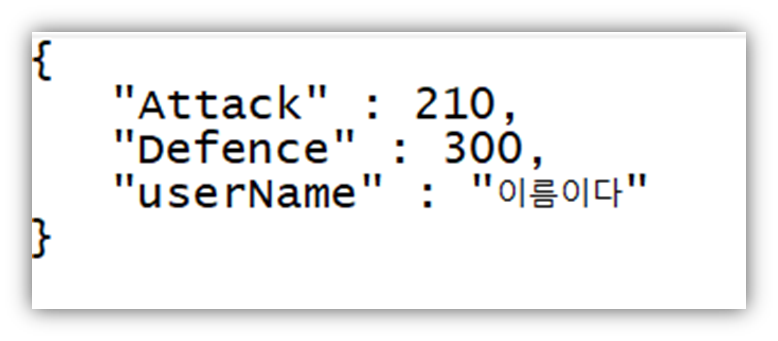

# pandas, json 패키지 활용

## CSV 파일 읽기와 저장

### CSV 패키지

- Read(읽기)

In [ ]:
# csv 파일 읽기
import csv

with open('서울_공영주차장_월별_주차현황.csv', newline='', encoding='euckr') as csvfile:
    creader = csv.reader(csvfile, delimiter=',' )
    for row in creader:
        print(', '.join(row))
        break

주차장명, 주차면수, 연월, 입차대수, 출차대수


In [ ]:
# csv 파일 읽어 리스트 자료형으로 저장
import csv

data_list = []
with open('서울_공영주차장_월별_주차현황.csv', newline='', encoding='euckr') as csvfile:
    creader = csv.reader(csvfile, delimiter=',' )
    for row in creader:
        data_list.append(row)

# 리스트 자료형 확인
print('row 수 = ', len(data_list))
print('col 수 = ', len(data_list[0]), len(data_list[3]), len(data_list[2]))

row 수 =  279
col 수 =  5 5 5


In [ ]:
# %%timeit
# col 갯수가 5개가 아닌 row 번호 이쁘게 출력 (고전적인 방법)
for x in data_list:
    x_len = len(x)
    if x_len != 5:
        print(x)

In [ ]:
# %%timeit
# col 갯수가 5개가 아닌 row 번호 이쁘게 출력 (python 언어만의 처리속도 개선 방법)
[x for idx, x in enumerate(data_list) if len(x) != 5]


[]

In [ ]:
# numpy array로 변환
import numpy as np

np_data = np.array(data_list)
np_data.shape

(279, 5)

- Write(쓰기)

In [ ]:
# csv 파일 생성
import csv
with open('새로운데이터.csv', 'w', newline='') as csvfile:
    cwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    cwriter.writerow(['컬럼1', '컬럼2', '컬럼3'])
    cwriter.writerow(['데이터11', '데이터21', '데이터31'])
    cwriter.writerow(['데이터12', '데이터22', '데이터32'])
    cwriter.writerow(['데이터13', '데이터23', '데이터33'])

In [ ]:
# 물리적으로 파일이 존재하는지 확인
!cat 새로운데이터.csv

컬럼1,컬럼2,컬럼3
데이터11,데이터21,데이터31
데이터12,데이터22,데이터32
데이터13,데이터23,데이터33


In [ ]:
# [검증] 생성된 csv 파일 읽기 - 리스트 자료형
import csv

with open('새로운데이터.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',' )
    for row in spamreader:
        print(', '.join(row))


컬럼1, 컬럼2, 컬럼3
데이터11, 데이터21, 데이터31
데이터12, 데이터22, 데이터32
데이터13, 데이터23, 데이터33


In [ ]:
# [검증] 생성된 csv 파일 읽기 - 딕셔너리 자료형
import csv

with open('새로운데이터.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for idx, row in enumerate(reader):
        print(row)


{'컬럼1': '데이터11', '컬럼2': '데이터21', '컬럼3': '데이터31'}
{'컬럼1': '데이터12', '컬럼2': '데이터22', '컬럼3': '데이터32'}
{'컬럼1': '데이터13', '컬럼2': '데이터23', '컬럼3': '데이터33'}


### pandas 패키지

In [ ]:
import pandas as pd
import json
data = pd.read_csv('서울_공영주차장_월별_주차현황.csv', encoding='euc-kr')
data

,주차장명,주차면수,연월,입차대수,출차대수
0,가양라이품,38,2021-09,831,846
1,가양라이품,38,2021-10,837,852
2,가양라이품,38,2021-11,942,953
3,가양라이품,38,2021-12,929,958
4,가양라이품,38,2022-01,769,793
...,...,...,...,...,...
273,훈련원공원,873,2021-12,23704,23831
274,훈련원공원,873,2022-01,20941,21057
275,훈련원공원,873,2022-02,18255,18289
276,훈련원공원,873,2022-03,22088,22206


In [ ]:
data.to_csv('백업.csv', index=False)

In [ ]:
import pandas as pd
import json
data = pd.read_csv('백업.csv')
data

,주차장명,주차면수,연월,입차대수,출차대수
0,가양라이품,38,2021-09,831,846
1,가양라이품,38,2021-10,837,852
2,가양라이품,38,2021-11,942,953
3,가양라이품,38,2021-12,929,958
4,가양라이품,38,2022-01,769,793
...,...,...,...,...,...
273,훈련원공원,873,2021-12,23704,23831
274,훈련원공원,873,2022-01,20941,21057
275,훈련원공원,873,2022-02,18255,18289
276,훈련원공원,873,2022-03,22088,22206


In [ ]:
import pandas as pd

parking = {'주차장명': ['가양라이품', '가양라이품', '가양라이품'],
           '주차면수': [38, 38, 38,]
           }

pd.DataFrame(parking)

,주차장명,주차면수
0,가양라이품,38
1,가양라이품,38
2,가양라이품,38


In [ ]:
import pandas as pd

parking = [
    ['가양라이품', '가양라이품', '가양라이품'],
    [38, 38, 38,]
]

pd.DataFrame(parking)

,0,1,2
0,가양라이품,가양라이품,가양라이품
1,38,38,38


In [ ]:
import pandas as pd
import numpy as np

parking = [
    ['가양라이품', '가양라이품', '가양라이품'],
    [38, 38, 38,]
]

parking = np.array(parking)

pd.DataFrame(parking)

,0,1,2
0,가양라이품,가양라이품,가양라이품
1,38,38,38


In [ ]:
import pandas as pd
import numpy as np

parking = [
    ['가양라이품', '가양라이품', '가양라이품'],
    [38, 38, 38,]
]

parking_dict = {}
for x in range(len(parking)):
    parking_dict[x] = parking[x]

parking_dict = {x: y for x, y in enumerate(parking)}

parking_dict

pd.DataFrame(parking_dict)

,0,1
0,가양라이품,38
1,가양라이품,38
2,가양라이품,38


In [4]:
import csv

with open('새로운데이터.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for idx, row in enumerate(reader):
        print(row)

# 자료형 변환 (dict to DataFrame)
import pandas as pd

pd.DataFrame.from_records(rows_list)

{'컬럼1': '데이터11', '컬럼2': '데이터21', '컬럼3': '데이터31'}
{'컬럼1': '데이터12', '컬럼2': '데이터22', '컬럼3': '데이터32'}
{'컬럼1': '데이터13', '컬럼2': '데이터23', '컬럼3': '데이터33'}


,컬럼1,컬럼2,컬럼3
0,데이터11,데이터21,데이터31
1,데이터12,데이터22,데이터32
2,데이터13,데이터23,데이터33


In [ ]:
import pandas as pd
train = pd.read_csv('titanic.csv', index_col='PassengerId', usecols=['PassengerId', 'Survived', 'Pclass', 'Name'])
train

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Name'], dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    object
dtypes: int64(2), object(1)
memory usage: 27.8+ KB


## JSON 파일 읽기와 저장

#### 기본 동작 (읽기와 쓰기)

In [ ]:
import json

with open('iris.json') as f:
    iris_json = json.loads(f.read())

iris_json

In [ ]:
import json

with open('iris_backup.json', 'w') as f:
    json.dump(iris_json, f)

In [ ]:
import json

with open('iris_backup.json') as f:
    iris_json = json.loads(f.read())

iris_json

In [ ]:
import json

data = {
    "김혜수" : {
        "gender": "female",
        "age" : 25,
        "hobby" : ["reading", "music"]
    },
    "상남자" : {
        "gender": "male",
        "age" : 28,
        "hobby" : ["development", "painting"]
    }
}

file_path = "인적사항.json"

with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(data, file)

In [ ]:
import json

with open('인적사항.json') as f:
    iris_json = json.loads(f.read())

iris_json

{'김혜수': {'gender': 'female', 'age': 25, 'hobby': ['reading', 'music']},
 '상남자': {'gender': 'male', 'age': 28, 'hobby': ['development', 'painting']}}

In [ ]:
import json

with open('인적사항.json') as f:
    iris_json = json.loads(f.read())

iris_json

{'김혜수': {'gender': 'female', 'age': 25, 'hobby': ['reading', 'music']},
 '상남자': {'gender': 'male', 'age': 28, 'hobby': ['development', 'painting']}}

#### dump() vs dumps()

In [ ]:
import json

dict_data = {
    "no": "9164042",
    "name": "LEE",
    "department": "INFO"
}
str_object = json.dumps(dict_data, indent=4)

print(type(str_object))
print(str_object)

<class 'str'>
{
    "no": "9164042",
    "name": "LEE",
    "department": "INFO"
}


In [ ]:
import json

dict_data = {
    "no": "9164042",
    "name": "LEE",
    "department": "INFO"
}

with open("입대정보.json", "w") as f:
    json.dump(dict_data, f)

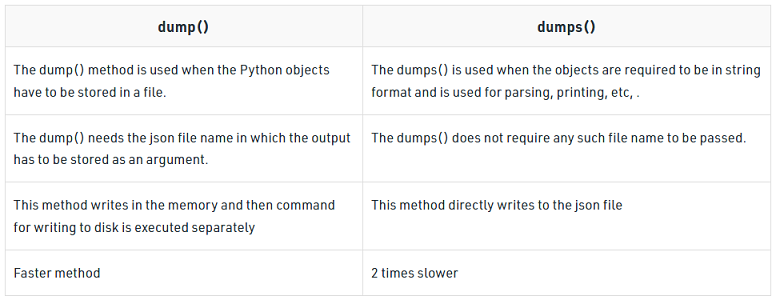

#### load() vs loads()

In [ ]:
import json

str_data = '{"no": "9164042", "name": "LEE", "department": "INFO"}'
dict_data = json.loads(str_data)

print(type(dict_data))
print(dict_data)

<class 'dict'>
{'no': '9164042', 'name': 'LEE', 'department': 'INFO'}


In [ ]:
import json

with open("입대정보.json", "r") as f:
    dict_data = json.load(f)

print(type(dict_data))
print(dict_data)

<class 'dict'>
{'no': '9164042', 'name': 'LEE', 'department': 'INFO'}


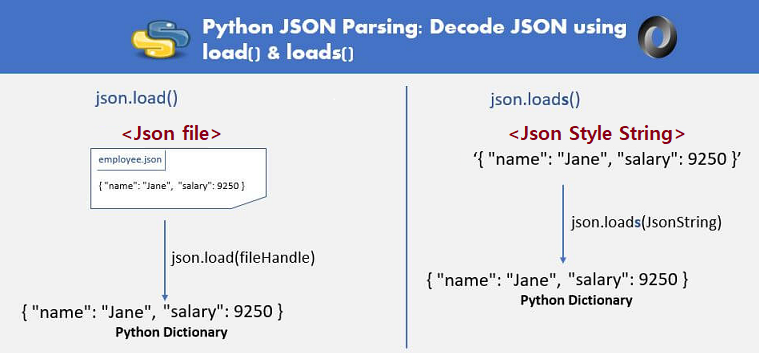

# CSV, JSON 형식 전환

## CSV to JSON

In [ ]:
import pandas as pd
import json
data = pd.read_csv('서울_공영주차장_월별_주차현황.csv', encoding='euc-kr')

data

,주차장명,주차면수,연월,입차대수,출차대수
0,가양라이품,38,2021-09,831,846
1,가양라이품,38,2021-10,837,852
2,가양라이품,38,2021-11,942,953
3,가양라이품,38,2021-12,929,958
4,가양라이품,38,2022-01,769,793
...,...,...,...,...,...
273,훈련원공원,873,2021-12,23704,23831
274,훈련원공원,873,2022-01,20941,21057
275,훈련원공원,873,2022-02,18255,18289
276,훈련원공원,873,2022-03,22088,22206


In [ ]:
# 고전적인 방법
all_dict = {}
for idx, x in enumerate(zip(data.columns, data.values.T)):
    dict_data = {x[0] : list(x[1])}
    all_dict[idx] = dict_data
all_dict

In [ ]:
# 고전적인 방법
with open("변환_주차장정보.json", "w") as f:
    json.dump(all_dict, f)

In [ ]:
# 고전적인 방법
with open('변환_주차장정보.json') as f:
    data_json = json.loads(f.read())

type(data_json), data_json

In [ ]:
# 모듈에서 지원하는 새로운 방법
data_json = data.to_json(orient="records", force_ascii=False)

print(type(data_json))
print(data_json)


<class 'str'>
[{"주차장명":"가양라이품","주차면수":38,"연월":"2021-09","입차대수":831,"출차대수":846},{"주차장명":"가양라이품","주차면수":38,"연월":"2021-10","입차대수":837,"출차대수":852},{"주차장명":"가양라이품","주차면수":38,"연월":"2021-11","입차대수":942,"출차대수":953},{"주차장명":"가양라이품","주차면수":38,"연월":"2021-12","입차대수":929,"출차대수":958},{"주차장명":"가양라이품","주차면수":38,"연월":"2022-01","입차대수":769,"출차대수":793},{"주차장명":"가양라이품","주차면수":38,"연월":"2022-02","입차대수":545,"출차대수":556},{"주차장명":"가양라이품","주차면수":38,"연월":"2022-03","입차대수":888,"출차대수":896},{"주차장명":"가양라이품","주차면수":38,"연월":"2022-04","입차대수":991,"출차대수":1005},{"주차장명":"개화산역","주차면수":322,"연월":"2021-09","입차대수":7076,"출차대수":7030},{"주차장명":"개화산역","주차면수":322,"연월":"2021-10","입차대수":7988,"출차대수":7959},{"주차장명":"개화산역","주차면수":322,"연월":"2021-11","입차대수":8348,"출차대수":8334},{"주차장명":"개화산역","주차면수":322,"연월":"2021-12","입차대수":8003,"출차대수":7979},{"주차장명":"개화산역","주차면수":322,"연월":"2022-01","입차대수":8456,"출차대수":8358},{"주차장명":"개화산역","주차면수":322,"연월":"2022-02","입차대수":7538,"출차대수":7563},{"주차장명":"개화산역","주차면수":322,"연월":"2022-03","입차대수":8588,"출차대수":8570},{"주차장명":"개

In [ ]:
# 모듈에서 지원하는 새로운 방법
file_name = "서울_공영주차장_월별_주차현황.json"
data.to_json(file_name, orient='records')


In [ ]:
# 모듈에서 지원하는 새로운 방법
import glob
glob.glob('./**')

['./iris_backup.json',
 './서울_공영주차장_월별_주차현황.csv',
 './iris.json',
 './서울_공영주차장_월별_주차현황.json',
 './drive',
 './변환_주차장정보.json',
 './입대정보.json',
 './인적사항.json',
 './새로운데이터.csv',
 './sample_data']

In [ ]:
# 모듈에서 지원하는 새로운 방법
with open('서울_공영주차장_월별_주차현황.json', encoding='euc-kr') as f:
    js = json.loads(f.read())
type(js)

list

In [ ]:
# 모듈에서 지원하는 새로운 방법
with open('서울_공영주차장_월별_주차현황.json', encoding='euc-kr') as f:
    js = json.load(f)
type(js)

list

## JSON to CSV

In [ ]:
import pandas as pd
import json

with open('/iris.json', encoding='euc-kr') as f:
    data_json = json.loads(f.read())

print(type(data_json))
print(data_json)

<class 'list'>
[{'sepalLength': 5.1, 'sepalWidth': 3.5, 'petalLength': 1.4, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 4.9, 'sepalWidth': 3.0, 'petalLength': 1.4, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 4.7, 'sepalWidth': 3.2, 'petalLength': 1.3, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 4.6, 'sepalWidth': 3.1, 'petalLength': 1.5, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 5.0, 'sepalWidth': 3.6, 'petalLength': 1.4, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 5.4, 'sepalWidth': 3.9, 'petalLength': 1.7, 'petalWidth': 0.4, 'species': 'setosa'}, {'sepalLength': 4.6, 'sepalWidth': 3.4, 'petalLength': 1.4, 'petalWidth': 0.3, 'species': 'setosa'}, {'sepalLength': 5.0, 'sepalWidth': 3.4, 'petalLength': 1.5, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 4.4, 'sepalWidth': 2.9, 'petalLength': 1.4, 'petalWidth': 0.2, 'species': 'setosa'}, {'sepalLength': 4.9, 'sepalWidth': 3.1, 'petalLength': 1.5, 'petalWidth': 0

In [ ]:
data_df = pd.DataFrame(data_json)
data_df

,주차장명,주차면수,연월,입차대수,출차대수
0,가양라이품,38,2021-09,831,846
1,가양라이품,38,2021-10,837,852
2,가양라이품,38,2021-11,942,953
3,가양라이품,38,2021-12,929,958
4,가양라이품,38,2022-01,769,793
...,...,...,...,...,...
273,훈련원공원,873,2021-12,23704,23831
274,훈련원공원,873,2022-01,20941,21057
275,훈련원공원,873,2022-02,18255,18289
276,훈련원공원,873,2022-03,22088,22206


In [ ]:
file_name = "JSON2CSV.csv"
data_df.to_csv(file_name, index=False)

In [ ]:
data = pd.read_csv('JSON2CSV.csv')
data

,주차장명,주차면수,연월,입차대수,출차대수
0,가양라이품,38,2021-09,831,846
1,가양라이품,38,2021-10,837,852
2,가양라이품,38,2021-11,942,953
3,가양라이품,38,2021-12,929,958
4,가양라이품,38,2022-01,769,793
...,...,...,...,...,...
273,훈련원공원,873,2021-12,23704,23831
274,훈련원공원,873,2022-01,20941,21057
275,훈련원공원,873,2022-02,18255,18289
276,훈련원공원,873,2022-03,22088,22206


In [ ]:
import pandas as pd
import json

with open('변환_주차장정보.json', encoding='euc-kr') as f:
    data_json = json.loads(f.read())

print(type(data_json))
print(data_json)

<class 'dict'>
{'0': {'주차장명': ['가양라이품', '가양라이품', '가양라이품', '가양라이품', '가양라이품', '가양라이품', '가양라이품', '가양라이품', '개화산역', '개화산역', '개화산역', '개화산역', '개화산역', '개화산역', '개화산역', '개화산역', '개화역', '개화역', '개화역', '개화역', '개화역', '개화역', '개화역', '개화역', '구로디지털단지역', '구로디지털단지역', '구로디지털단지역', '구로디지털단지역', '구로디지털단지역', '구로디지털단지역', '구로디지털단지역', '구로디지털단지역', '구파발역', '구파발역', '구파발역', '구파발역', '구파발역', '구파발역', '구파발역', '구파발역', '남산예장', '남산예장', '남산예장', '남산예장', '남산예장', '남산예장', '남산예장', '남산예장', '도봉산역', '도봉산역', '도봉산역', '도봉산역', '도봉산역', '도봉산역', '도봉산역', '도봉산역', '동대문', '동대문', '동대문', '동대문', '동대문', '동대문', '동대문', '동대문', '마포유수지', '마포유수지', '마포유수지', '마포유수지', '마포유수지', '마포유수지', '마포유수지', '마포유수지', '복정역', '복정역', '복정역', '복정역', '복정역', '복정역', '복정역', '복정역', '사당노외', '사당노외', '사당노외', '사당노외', '사당노외', '사당노외', '사당노외', '사당노외', '서울글로벌센터', '서울글로벌센터', '서울글로벌센터', '서울글로벌센터', '서울글로벌센터', '서울글로벌센터', '서울글로벌센터', '서울글로벌센터', '세종로', '세종로', '세종로', '세종로', '세종로', '세종로', '세종로', '세종로', '수락산역', '수락산역', '수락산역', '수락산역', '수락산역', '수락산역', '수락산역', '수락산역', '수서역남', '수서역남', '수서역남', '수서역남', '

# 🍩 Tip !!! 직렬화 (Serialize)

In [ ]:
import pickle

exam_result = {'국어': 90,
               '수학': 100,
               '영어': 95,
               '화학': 100
               }

# pickle로 파일 쓰기
with open('pick_exam.dat', 'wb') as f:
    pickle.dump(exam_result, f)

# pickle로 쓰인 파일 읽기
with open('pick_exam.dat', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data

{'국어': 90, '수학': 100, '영어': 95, '화학': 100}

In [ ]:
!cat pick_exam.dat

��1       }�(�국어�KZ�수학�Kd�영어�K_�화학�Kdu.

In [ ]:
import json

exam_result = {'국어': 90,
               '수학': 100,
               '영어': 95,
               '화학': 100
               }

# json으로 파일 쓰기
with open('json_exam.dat', 'w', encoding='utf-8') as f:
    json.dump(exam_result, f)

# json으로 쓰인 파일 읽기
with open('json_exam.dat', 'r') as f:
    data = json.load(f)

In [ ]:
data

{'국어': 90, '수학': 100, '영어': 95, '화학': 100}

In [ ]:
!cat json_exam.dat

{"\uad6d\uc5b4": 90, "\uc218\ud559": 100, "\uc601\uc5b4": 95, "\ud654\ud559": 100}